<a href="https://colab.research.google.com/github/BenShieh233/LearnPython/blob/main/04_async_officebuilding_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base Model that Prints Output


In [3]:
#inputs
total_sqft = 180000

m = -0.05
b = 1.5

op_expense_per_sqft = 1.20
heating_surcharge_per_sqft = .2
op_exp_annual_growth = .12
annual_mortgage = 1500000
tax_rate = .34

price_per_sqft = [15, 15, 15, 15, 15]

num_years = 5


In [4]:
#rev calc
perc_occ = [m*price_per_sqft[i] + b for i in range(num_years)]
sqft_occ = [perc_occ[i]*total_sqft for i in range(num_years)]
revenue = [sqft_occ[i]*price_per_sqft[i] for i in range(num_years)]
print("revenue: ", revenue)

revenue:  [2025000.0, 2025000.0, 2025000.0, 2025000.0, 2025000.0]


In [5]:
#operating expense calculations
base_op_cost_as_percY1 = [(1+op_exp_annual_growth)**i for i in range(num_years)] #note that range(num_years) = range(5) = [0,1,2,3,4] and (1+op_exp_annual_growth)**0 = 1.
base_op_cost = [op_expense_per_sqft*total_sqft*base_op_cost_as_percY1[i] for i in range(num_years)]
heating_surcharge = [perc_occ[i]*base_op_cost[i]*heating_surcharge_per_sqft for i in range(num_years)]
mortgage = [annual_mortgage for i in range(num_years)]
operating_costs = [base_op_cost[i] + heating_surcharge[i] + mortgage[i] for i in range(num_years)]
print("operating costs:", operating_costs)

operating costs: [1748400.0, 1778208.0, 1811592.96, 1848984.1152000001, 1890862.2090240002]


In [6]:
#before and after-tax earnings
ebt = [revenue[i] - operating_costs[i] for i in range(num_years)]
taxes = [ebt[i]*tax_rate for i in range(num_years)]
earnings_after_tax = [ebt[i] - taxes[i] for i in range(num_years)]
print("earnings after tax: ", earnings_after_tax)

total_earnings_after_tax = sum(earnings_after_tax)
print("total earnings after tax: ", total_earnings_after_tax)

earnings after tax:  [182556.0, 162882.72, 140848.64640000003, 116170.48396799993, 88530.94204415986]
total earnings after tax:  690988.7924121597


#Model as Function



In [7]:
def office_earnings(total_sqft = 180000,
           m = -0.05,
           b = 1.5,
           op_expense_per_sqft = 1.20,
           heating_surcharge_per_sqft = .2,
           op_exp_annual_growth = .12,
           annual_mortgage = 1500000,
           tax_rate = .34,
           price_per_sqft = [15, 15, 15, 15, 15],
           num_years = 5):
  #rev calc
  perc_occ = [m*price_per_sqft[i] + b for i in range(num_years)]
  sqft_occ = [perc_occ[i]*total_sqft for i in range(num_years)]
  revenue = [sqft_occ[i]*price_per_sqft[i] for i in range(num_years)]
  #operating expense calculations
  base_op_cost_as_percY1 = [(1+op_exp_annual_growth)**i for i in range(num_years)] #note that range(num_years) = range(5) = [0,1,2,3,4] and (1+op_exp_annual_growth)**0 = 1.
  base_op_cost = [op_expense_per_sqft*total_sqft*base_op_cost_as_percY1[i] for i in range(num_years)]
  heating_surcharge = [perc_occ[i]*base_op_cost[i]*heating_surcharge_per_sqft for i in range(num_years)]
  mortgage = [annual_mortgage for i in range(num_years)]
  operating_costs = [base_op_cost[i] + heating_surcharge[i] + mortgage[i] for i in range(num_years)]
  #before and after-tax earnings
  ebt = [revenue[i] - operating_costs[i] for i in range(num_years)]
  taxes = [ebt[i]*tax_rate for i in range(num_years)]
  earnings_after_tax = [ebt[i] - taxes[i] for i in range(num_years)]
  total_earnings_after_tax = sum(earnings_after_tax)
  return total_earnings_after_tax


In [ ]:
office_earnings()

690988.7924121597

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
num_sim = 10000
sim_total_sqft = np.random.normal(180000, 0.2*180000, num_sim)
sim_m = np.random.normal(-0.05, 0.2*0.05, num_sim)
sim_b = np.random.normal(1.5, 0.2*1.5, num_sim)
sim_op_expense_per_sqft = np.random.normal(1.20, 0.2*1.20, num_sim)
sim_heating_surcharge_per_sqft = np.random.normal(0.2, 0.2*0.2, num_sim)
sim_op_exp_annual_growth = np.random.normal(0.12, 0.2*0.12, num_sim)


In [29]:
# Simulation
data = pd.DataFrame(zip(sim_total_sqft, sim_m, sim_b, sim_op_expense_per_sqft
                        , sim_heating_surcharge_per_sqft, sim_op_exp_annual_growth ),
                     columns = ["total_sqft", "m", "b", "op_expense_per_sqft", "heating_surcharge_per_sqft", 
                               "op_exp_annual_growth"])
data["office_earnings"] = data.apply(lambda x: office_earnings(total_sqft=x.total_sqft,
                                                               m=x.m,
                                                               b=x.b,
                                                               op_expense_per_sqft=x.op_expense_per_sqft,
                                                               heating_surcharge_per_sqft=x.heating_surcharge_per_sqft,
                                                               op_exp_annual_growth=x.op_exp_annual_growth), axis=1)
data

,total_sqft,m,b,op_expense_per_sqft,heating_surcharge_per_sqft,op_exp_annual_growth,office_earnings
0,195366.928306,-0.048804,1.609446,0.682819,0.202151,0.159475,2.822756e+06
1,207463.677500,-0.044478,1.234906,1.119167,0.135345,0.122774,-1.738020e+05
2,140466.969647,-0.065319,1.106602,1.640783,0.197493,0.123106,-5.064919e+06
3,221438.681971,-0.070514,0.843470,1.456746,0.225844,0.145968,-8.653483e+06
4,223570.004123,-0.036564,1.015908,1.266215,0.185081,0.114421,-1.052332e+06
...,...,...,...,...,...,...,...
9995,115227.481335,-0.034364,1.481718,0.950717,0.201233,0.096990,3.718004e+04
9996,199495.369104,-0.045418,1.561737,1.165694,0.231090,0.132141,2.542532e+06
9997,119158.613785,-0.053475,1.323364,1.528072,0.199837,0.103996,-2.692089e+06
9998,199903.990851,-0.074991,1.740728,0.809855,0.170941,0.109001,4.101226e+05


(array([  35.,  315., 1425., 2966., 2722., 1669.,  628.,  194.,   39.,
           7.]),
 array([-9618713.82686608, -7147429.61481102, -4676145.40275596,
        -2204861.19070091,   266423.02135415,  2737707.23340921,
         5208991.44546427,  7680275.65751933, 10151559.86957439,
        12622844.08162945, 15094128.29368451]),
 <a list of 10 Patch objects>)

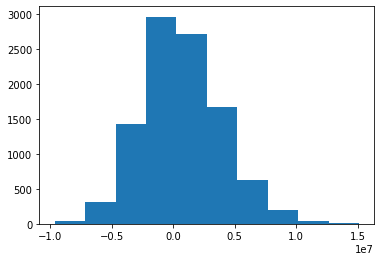

In [11]:
# Evaluate office earnings outcome
plt.hist(data["office_earnings"])

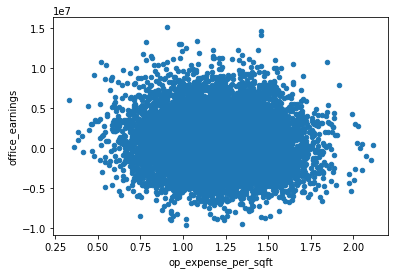

In [12]:
# Scatterplot
data.plot.scatter("op_expense_per_sqft", "office_earnings")


In [13]:
# Linear Regression
import statsmodels.api as sm

In [23]:
X = sm.add_constant(data.iloc[:,0:6])
y = data.iloc[:,6]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
mod = sm.OLS(y,X,hasconstant=True)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        office_earnings   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 4.750e+04
Date:                Wed, 02 Nov 2022   Prob (F-statistic):               0.00
Time:                        01:54:12   Log-Likelihood:            -1.4710e+05
No. Observations:               10000   AIC:                         2.942e+05
Df Residuals:                    9993   BIC:                         2.943e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -9.94e+06   7.25e+04   -137.105      0.000   -1.01e+07    -9.8e+06
total_sqft                    30.8588      0.164    188.275      0.000      30.537      31.180
m                           1.319e+08   5.92e+05    222.930      0.000    1.31e+08    1.33e+08
b                           8.756e+06   1.97e+04    445.182      0.000    8.72e+06    8.79e+06
op_expense_per_sqft        -8.969e+05   2.48e+04    -36.174      0.000   -9.46e+05   -8.48e+05
heating_surcharge_per_sqft -7.223e+05   1.47e+05     -4.917      0.000   -1.01e+06   -4.34e+05
op_exp_annual_growth       -2.035e+06   2.47e+05     -8.239      0.000   -2.52e+06   -1.55e+06
==============================================================================
Omnibus:                     1289.408   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14756.562
Skew:                          -0.147   Prob(JB):                         0.00
Kurtosis:                       8.944   Cond. No.                     1.84e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.84e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# Normalize coefficients to reflect standard deviations of inputs
result.params * X.std()

const                        -0.000000e+00
total_sqft                    1.115454e+06
m                             1.320636e+06
b                             2.637603e+06
op_expense_per_sqft          -2.143336e+05
heating_surcharge_per_sqft   -2.912834e+04
op_exp_annual_growth         -4.881234e+04
dtype: float64

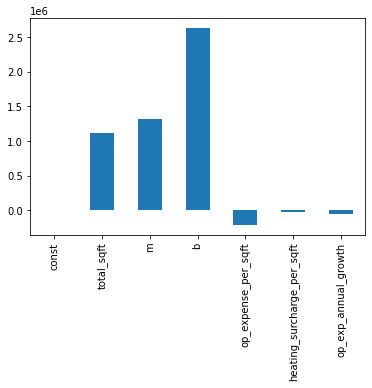

In [28]:
# bar graph these things
normalized_coefficients = result.params * X.std()
normalized_coefficients.plot.bar()